# Welcome to my First Kernel !


### table of contents :

- **Introduction**:
  - About Boston dataset : 
    - Dependent variable : median_house_value
    - Independent variables : 
        - Numerical variables : housing_median_age, total_rooms, total_bedrooms ,population, households, median_income ,longitude and latitude
        - Categorial variables : ocean_proximity
- **Discovering & understanding the data** :
  - data's shape and type
  - variable's distributions
  - Finding missing values
  - Correlations between independent and dependent variables
- **Features Engineering** :
  - Adding new variables
  - Handling missing values
  - Handling categorial variables
  - Handling noisy data 
- **Preprocessing** :
  - Splitting data into training and validation set
  - Creating some useful functions in order to use them in Modelling
  - Using Pipelines
- **Modelling** :
  - The Algorithms that i used in this notebook, plus a brief description of each one
      - Linear Models : LinearRegression ,Laso, Ridge, ElasticNet
      - Support Vector Machine Regressor
      - K-Nearest Neighbors Regressor
      - Decision Tree Regressor
      - Ensemble methods : RandomForestRegressor and AdaBoost
  - The Metrics that i used to quantify the models' performance, plus a brief description of each one 
      - MAE
      - MSE
      - RMSE
      - R2 
  
  


-  "Sorry if i made any mistakes. English is not my native language"

In [164]:
#Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

In [147]:
#Importing the data
boston = pd.read_table('housing_data.txt', sep=',')

### Let's first Look at the data

In [148]:
#Peek at the Data
boston.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [149]:
#the shape of data
boston.shape

(20640, 10)

In [161]:
#getting a quick description of the data, in particular the number of non-null, and each attribute’s type 
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19675 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19675 non-null  float64
 1   latitude            19675 non-null  float64
 2   housing_median_age  19675 non-null  float64
 3   total_rooms         19675 non-null  float64
 4   total_bedrooms      19475 non-null  float64
 5   population          19675 non-null  float64
 6   households          19675 non-null  float64
 7   median_income       19675 non-null  float64
 8   median_house_value  19675 non-null  float64
 9   ocean_proximity     19675 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


- The total_bedrooms variable have missing values 


In [151]:
#The describe() method shows a summary of the numerical attributes
boston.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [152]:
#Class Distribution of the categorial variable 
boston['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [153]:
#Finding NaN values 
boston.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

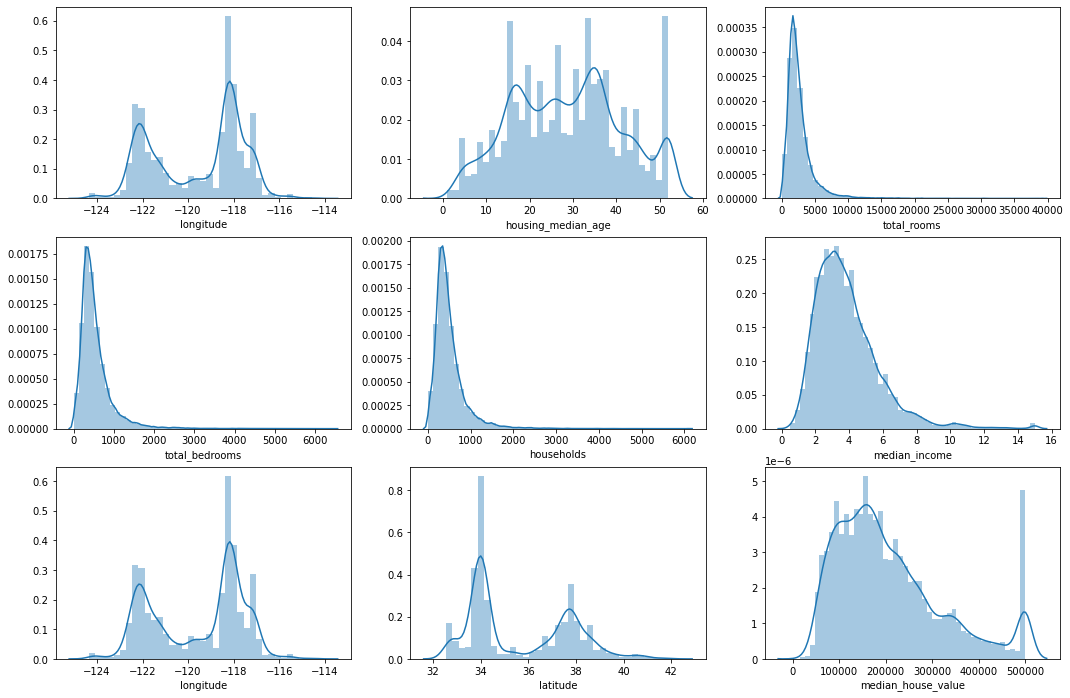

In [154]:
#Visualization of the variables' distribution

columns = ['longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms','households', 'median_income','longitude',
        'latitude','median_house_value']


def distplot(nrows, ncols, columns):

    rows=nrows
    cols=ncols

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))

    columns = columns
    index=0

    for i in range(rows):
        for j in range(cols):
            sns.distplot(boston[columns[index]], ax=ax[i][j])
            index+=1

        
distplot(3, 3, columns)

##### Some explorations : 

These histograms reveal a few things :

- We notice that the housing_median_age and the median_house_value were capped
- In median_hous_value's histogram, the target variable, Machine Learning algorithms may learn that prices will never go beyond the limit "$500,000" 
- The same thing with the housing median age variable, they might learn that median age will never go beyond 50, 36, and 16 years 
     - We will clean up those districts from the data later before feeding the data to a Machine Learning algorithm 
- Some variables are tail heavy : they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. 
    - So, we will transforming those attributes later to have more bell-shaped distributions if there are correlated with the target


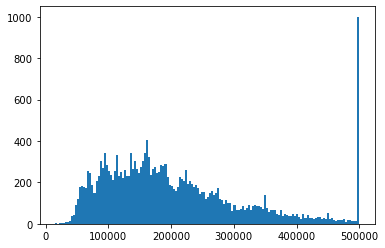

In [155]:
#let’s zoom in on the target variable
plt.figure()
plt.hist(boston['median_house_value'], bins=150)
plt.show()

In [156]:
#The shape of those districts
boston[boston['median_house_value'] >= 500000 ].shape

(992, 10)

In [157]:
#The shape of the data without those districts 
boston[boston['median_house_value'] <= 500000].shape

(19675, 10)

In [158]:
#Removing those districts from the data
boston = boston[boston['median_house_value'] <= 500000]
boston.shape

(19675, 10)

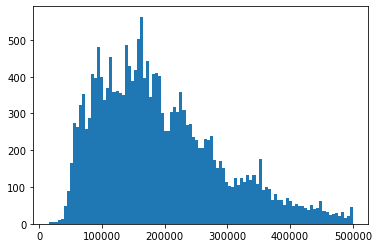

In [159]:
#Making sure that our target is clean
plt.figure()
plt.hist(boston['median_house_value'], bins=100)
plt.show()

### Feature Engineering
1 - Adding new variables :

In [129]:
boston["rooms_per_household"] = boston["total_rooms"] / boston["households"]
boston["bedrooms_per_room"] = boston["total_bedrooms"] / boston["total_rooms"]
boston["population_per_household"] = boston["population"] / boston["households"]

In [130]:
boston.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


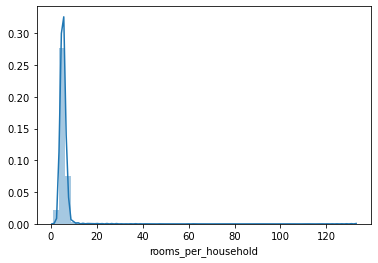

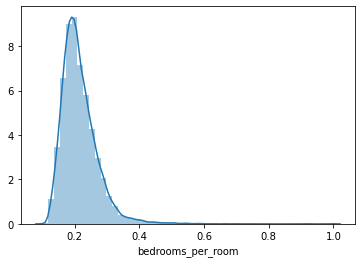

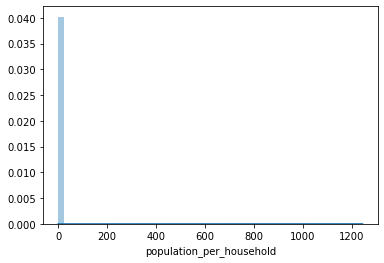

In [139]:
#Visualisation the distribution of those new variables 

new_columns = ['rooms_per_household', 'bedrooms_per_room','population_per_household']

for col in new_columns :
    plt.figure()
    sns.distplot(boston[col])
    plt.show()


#### Correlation Matrix

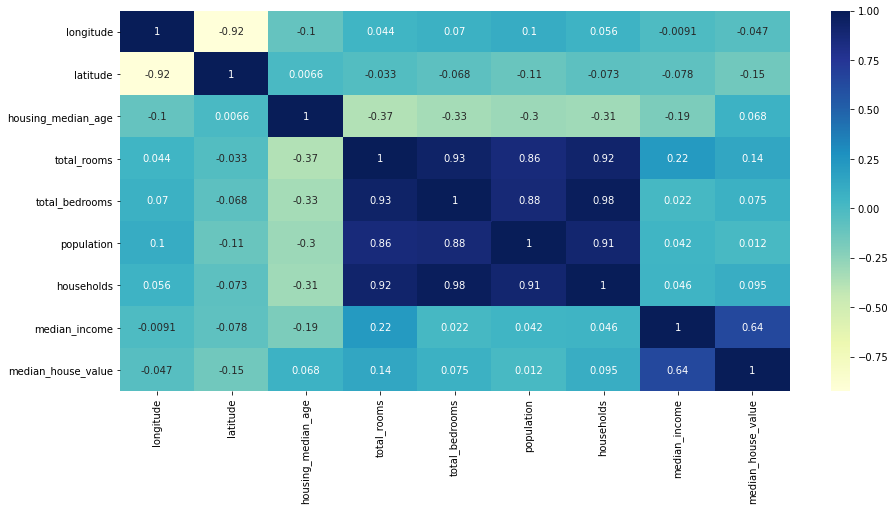

In [163]:
# Visualization of the correlation between all the numerical variables
plt.figure(figsize=(15,7))
corr_matrix = boston.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [43]:
# The correlation between the targer and other variables
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.642611
total_rooms                 0.143139
rooms_per_household         0.109673
households                  0.094894
total_bedrooms              0.074672
housing_median_age          0.067948
population                  0.011964
population_per_household   -0.021465
longitude                  -0.046658
latitude                   -0.148289
bedrooms_per_room          -0.215950
Name: median_house_value, dtype: float64

- Median income, total rooms and bedrooms per room are more correlated with the target variable


#### Visualizing Geographical Data

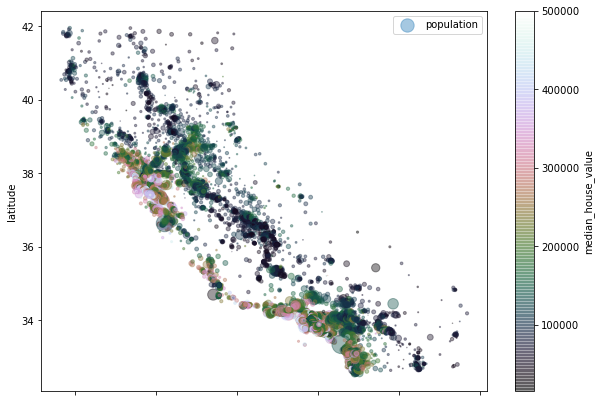

In [162]:
boston.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, label='population',
            figsize=(10,7),c='median_house_value',s=boston['population']/100, cmap=plt.get_cmap('cubehelix') ,colorbar=True)
              
plt.legend()

This geographical scatterplot of the data tells us that the housing prices are very much related to the location (close to the ocean) and to the population density

## Preprocessing

In [45]:
boston = boston[['median_income','total_rooms','bedrooms_per_room','households','total_bedrooms','housing_median_age','population_per_household','ocean_proximity','longitude','latitude','median_house_value']]
boston.head()

,median_income,total_rooms,bedrooms_per_room,households,total_bedrooms,housing_median_age,population_per_household,ocean_proximity,longitude,latitude,median_house_value
0,8.3252,880.0,0.146591,126.0,129.0,41.0,2.555556,NEAR BAY,-122.23,37.88,452600.0
1,8.3014,7099.0,0.155797,1138.0,1106.0,21.0,2.109842,NEAR BAY,-122.22,37.86,358500.0
2,7.2574,1467.0,0.129516,177.0,190.0,52.0,2.802260,NEAR BAY,-122.24,37.85,352100.0
3,5.6431,1274.0,0.184458,219.0,235.0,52.0,2.547945,NEAR BAY,-122.25,37.85,341300.0
4,3.8462,1627.0,0.172096,259.0,280.0,52.0,2.181467,NEAR BAY,-122.25,37.85,342200.0


#### Removing Missing Values

In [46]:
boston.dropna(axis=0, inplace=True)
print(boston.isna().sum())

median_income               0
total_rooms                 0
bedrooms_per_room           0
households                  0
total_bedrooms              0
housing_median_age          0
population_per_household    0
ocean_proximity             0
longitude                   0
latitude                    0
median_house_value          0
dtype: int64


In [47]:
#resetting index 
boston = boston.set_index(np.arange(0,19475))
boston

,median_income,total_rooms,bedrooms_per_room,households,total_bedrooms,housing_median_age,population_per_household,ocean_proximity,longitude,latitude,median_house_value
0,8.3252,880.0,0.146591,126.0,129.0,41.0,2.555556,NEAR BAY,-122.23,37.88,452600.0
1,8.3014,7099.0,0.155797,1138.0,1106.0,21.0,2.109842,NEAR BAY,-122.22,37.86,358500.0
2,7.2574,1467.0,0.129516,177.0,190.0,52.0,2.802260,NEAR BAY,-122.24,37.85,352100.0
3,5.6431,1274.0,0.184458,219.0,235.0,52.0,2.547945,NEAR BAY,-122.25,37.85,341300.0
4,3.8462,1627.0,0.172096,259.0,280.0,52.0,2.181467,NEAR BAY,-122.25,37.85,342200.0
...,...,...,...,...,...,...,...,...,...,...,...
19470,1.5603,1665.0,0.224625,330.0,374.0,25.0,2.560606,INLAND,-121.09,39.48,78100.0
19471,2.5568,697.0,0.215208,114.0,150.0,18.0,3.122807,INLAND,-121.21,39.49,77100.0
19472,1.7000,2254.0,0.215173,433.0,485.0,17.0,2.325635,INLAND,-121.22,39.43,92300.0
19473,1.8672,1860.0,0.219892,349.0,409.0,18.0,2.123209,INLAND,-121.32,39.43,84700.0


In [48]:
#making sure that no Missing values are left
boston.isna().sum()

median_income               0
total_rooms                 0
bedrooms_per_room           0
households                  0
total_bedrooms              0
housing_median_age          0
population_per_household    0
ocean_proximity             0
longitude                   0
latitude                    0
median_house_value          0
dtype: int64

#### Handing categorial variables

In [49]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = boston[['ocean_proximity']]

transformer = OneHotEncoder(sparse=False)
boston_ohe = transformer.fit_transform(housing_cat)
boston_ohe

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [50]:
OneHotEncoder = pd.DataFrame(data = boston_ohe, columns=['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'])

OneHotEncoder 

,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
19470,0.0,1.0,0.0,0.0,0.0
19471,0.0,1.0,0.0,0.0,0.0
19472,0.0,1.0,0.0,0.0,0.0
19473,0.0,1.0,0.0,0.0,0.0


In [51]:
#Making sure that no NaN in our encoding data
OneHotEncoder.isna().sum()

<1H OCEAN     0
INLAND        0
NEAR OCEAN    0
NEAR BAY      0
ISLAND        0
dtype: int64

In [52]:
#Dropping the variable 'ocean_proximity' in our data
boston.drop(columns=['ocean_proximity'], axis=1, inplace=True)
boston

,median_income,total_rooms,bedrooms_per_room,households,total_bedrooms,housing_median_age,population_per_household,longitude,latitude,median_house_value
0,8.3252,880.0,0.146591,126.0,129.0,41.0,2.555556,-122.23,37.88,452600.0
1,8.3014,7099.0,0.155797,1138.0,1106.0,21.0,2.109842,-122.22,37.86,358500.0
2,7.2574,1467.0,0.129516,177.0,190.0,52.0,2.802260,-122.24,37.85,352100.0
3,5.6431,1274.0,0.184458,219.0,235.0,52.0,2.547945,-122.25,37.85,341300.0
4,3.8462,1627.0,0.172096,259.0,280.0,52.0,2.181467,-122.25,37.85,342200.0
...,...,...,...,...,...,...,...,...,...,...
19470,1.5603,1665.0,0.224625,330.0,374.0,25.0,2.560606,-121.09,39.48,78100.0
19471,2.5568,697.0,0.215208,114.0,150.0,18.0,3.122807,-121.21,39.49,77100.0
19472,1.7000,2254.0,0.215173,433.0,485.0,17.0,2.325635,-121.22,39.43,92300.0
19473,1.8672,1860.0,0.219892,349.0,409.0,18.0,2.123209,-121.32,39.43,84700.0


In [53]:
# Verifying if really their shapes match before concatenation 
print(OneHotEncoder.shape)
print(boston.shape)

(19475, 5)
(19475, 10)


In [54]:
#concatenating boston and OneHotEncoder
boston_prep = pd.concat([boston, OneHotEncoder], axis=1)
boston_prep


,median_income,total_rooms,bedrooms_per_room,households,total_bedrooms,housing_median_age,population_per_household,longitude,latitude,median_house_value,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,8.3252,880.0,0.146591,126.0,129.0,41.0,2.555556,-122.23,37.88,452600.0,0.0,0.0,0.0,1.0,0.0
1,8.3014,7099.0,0.155797,1138.0,1106.0,21.0,2.109842,-122.22,37.86,358500.0,0.0,0.0,0.0,1.0,0.0
2,7.2574,1467.0,0.129516,177.0,190.0,52.0,2.802260,-122.24,37.85,352100.0,0.0,0.0,0.0,1.0,0.0
3,5.6431,1274.0,0.184458,219.0,235.0,52.0,2.547945,-122.25,37.85,341300.0,0.0,0.0,0.0,1.0,0.0
4,3.8462,1627.0,0.172096,259.0,280.0,52.0,2.181467,-122.25,37.85,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19470,1.5603,1665.0,0.224625,330.0,374.0,25.0,2.560606,-121.09,39.48,78100.0,0.0,1.0,0.0,0.0,0.0
19471,2.5568,697.0,0.215208,114.0,150.0,18.0,3.122807,-121.21,39.49,77100.0,0.0,1.0,0.0,0.0,0.0
19472,1.7000,2254.0,0.215173,433.0,485.0,17.0,2.325635,-121.22,39.43,92300.0,0.0,1.0,0.0,0.0,0.0
19473,1.8672,1860.0,0.219892,349.0,409.0,18.0,2.123209,-121.32,39.43,84700.0,0.0,1.0,0.0,0.0,0.0


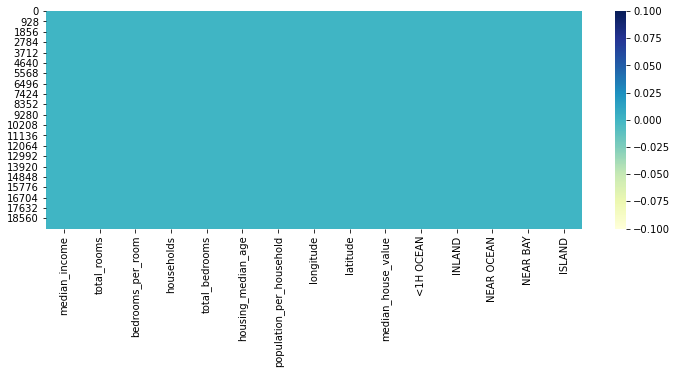

In [181]:
#Again, making sure after concatenating that they are no missing values 
plt.figure(figsize=(12,4))
sns.heatmap(boston_prep.isna(), cmap='YlGnBu')

## Modelling

- **learning curves**: 
    - Learning curves of model performance on the train and validation datasets can be used to diagnose an underfit, overfit, or well-fit model.

- **Grid search** 
     - performs a combination of hyperparameter tuning in order to determine the optimal combination values for a given model.
     - The grid search approach is fine when you are exploring relatively few combinations

- **Randomized Search** 
     - Can be used in much the same way as the GridSearchCV , but instead of trying out all possible combinations , it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.



- **Regression Evaluation Metrics**

  - <i>Mean Absolute Error (MAE)</i>:
  
      - is the mean of the absolute value of the errors
      - sometimes it is called the Manhattan norm (l1 norm).
      - Mathematical Formula :   $MAE(X,h)=\frac{1}{m}\sum\limits_{i=1}^{m}|h(x^{i})-y^{i}|$ 
  
  - <i> Mean Squared Error (MSE)</i>: 
      - is the mean of the squared errors
      - Mathematical Formula:   $MSE(X,h)=\frac{1}{m}\sum\limits_{i=1}^{m}(h(x^{i})-y^{i})^{2}$
  
  - <i>Root Mean Squared Error (RMSE)</i>:
       - is the square root of the mean of the squared errors 
       - corresponds to the Euclidian norm (l2 norm)
       - RMSE is more sensitive to outliers than the MAE
       - RMSE is interpretable in the "y" units
       - Mathematical Formula: :  $RMSE(X,h)=\sqrt{ \frac{1}{m}\sum\limits_{i=1}^{m}(h(x^{i})-y^{i})^{2}}$ 
  
  - <i>Coefficient of determination (R2)</i>:
       - It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.
       - the value of R2 range from 0 to 1 
           - A model with an R2 equal 1 perfetly predicts the target variable, whereas a model with R2 of 0 always fails to predict the target variables
       - Mathematical Formula : $R^{2}= 1 - \frac{SS_{res}}{SS_{tot}}$   Where,
       
            - $SS_{res}$ is the sum of squares of the residual errors between the actual y and the predicated y.
            - it's representing the ML algorithm error score 
            - $SS_{tot}$ is the total sum of the errors (the sum of the squared deviation of the actual y from the                centre)
            - it is representing the Mean Model

In [56]:
boston = boston_prep.copy()

In [57]:
#Importing the necessary libraries for modeling

from sklearn.model_selection import cross_val_score, learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### Creating functions to use them in modeling

In [58]:
def train_test_split_(data ,target_var) :

    X = data.drop([target_var], axis=1)
    y = data[target_var]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )
    return (X_train, X_test, y_train, y_test)



def model_val_scores(mod, X_train, y_train, cv=5):
        
    score_val = []
    standard_deviation = []
        
    scores = cross_val_score(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    rmse_scores = np.sqrt(-scores)
    scores_mean = rmse_scores.mean()
    scores_std = rmse_scores.std()
        
    score_val.append(scores_mean)
    standard_deviation.append(scores_std)
    
    return pd.DataFrame(data=[score_val, standard_deviation], index = ['scores_val', 'scores_std']) 


def learning_curves(mod, X_train, y_train , cv=5):
    
    N , train_score, val_score = learning_curve(mod, X_train, y_train,  cv=5 , train_sizes=np.linspace(0.2 ,1.0, 5))

    plt.plot(N, train_score.mean(axis=1), label='Train')
    plt.plot(N, val_score.mean(axis=1), label='Validation')
    plt.xlabel('train size')
    plt.legend()
    

#For tuning params and find the best params where the model performs well
def RandomizeSearchCV_(model, param_grid, X_train, y_train ) :
    
    randomSCV = RandomizedSearchCV(model, param_grid, n_iter=30, cv=5, scoring='neg_mean_squared_error', random_state=42)

    randomSCV.fit(X_train, y_train)
    model_best_params = randomSCV.best_estimator_
    
    print('best score :', randomSCV.best_score_ )
    print('best params :', randomSCV.best_params_ )
    
    return model_best_params

def GridSearchCV_(mod, param_grid, X_train, y_train):
    grid = GridSearchCV(estimator=mod, param_grid=param_grid, cv= 5, scoring='neg_mean_squared_error')
    
    grid.fit(X_train, y_train)
    model_best_params = grid.best_estimator_
    
    print('best score :', grid.best_score_ )
    print('best params :', grid.best_params_ )
    
    return model_best_params


def performance_metrics(y_test, y_pred):
    
    r2_scores  = []
    mae_value  = []
    mse_value  = []
    rmse_value = []
   
    scores = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    r2_scores.append(scores)
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    
    metrics_dataframe=pd.DataFrame(data= [r2_scores, mae_value, mse_value, rmse_value],
                                index=['r2_score','MAE','MSE','RMSE'])
    return metrics_dataframe.T


#### Splitting the data 

In [59]:
X_train, X_test, y_train, y_test = train_test_split_(boston, 'median_house_value')

print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (15580, 14)
X_test : (3895, 14)
y_train : (15580,)
y_test : (3895,)


# Linear Models

- linear Regression model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term)
- Linear Regression models use two different ways to compute the model parameters that best fit the model to the training set :
    - Using a direct “**closed-form**” equation that directly computes the model parameters that minimize the cost function over the training set , like the Normal Equation
    - Using an **iterative optimization approach** that gradually tweaks the model parameters in order to minimize the cost function over the training set, like  Gradient Descent (GD)
        - Some few variants of Gradient Descent : Batch GD, Mini-batch GD, and Stochastic GD

- Linear Assumption
    - **Linear Assumption** :Linear regression assumes that the relationship between our input and output is linear, if it is not the case we may need to transform data to make the relationship linear (e.g. log transform for an exponential )
    - **Remove Noise** : Linear regression assumes that your input and output variables are not noisy
    - **Remove Collinearity** :Linear regression will over-fit your data when you have highly correlated input variables
    - **Gaussian Distributions** : Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
    - **Rescale Inputs** : Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.


### LinearRegression

- Linear Regression model uses the Normal Equation which directly computes the model parameters that best fit the model to the training set (the model parameters that minimize the cost function over the training set)
- Linear Regression model equation :
  $\hat{Y} = \theta_{0} + \sum \limits _{i=1} ^{n} X_{i}\theta_{i} $
  
   - ŷ is the predicted value
   - n is the number of features.
   - $X_{i}$ is the $i^{th}$ feature value.
   - $\theta$ is the model parameter (including the bias term $\theta_{θ}$  and the feature weights $\theta_{1}$ , $\theta_{2}$ ,..., $\theta_{3}$ ).


Normal Equation : 

- The Normal Equation : $\hat{\theta} = (X^{T}.X)^{-1}.X^{T}.y $
   - $\hat{\theta}$ is the value of θ that minimizes the cost function
   - y is the vector of target values containing $y_{1}$ to $y_{m}$
   - $X^{T}.X$ is the dot product of $X^{T}$ and $X$
   - $X^{T}$ is the transpose of $X$ 
- The Normal Equation gets very slow when the number of features grows large 
- The Normal Equation handles large training sets efficiently, provided they can fit in memory
- Feature scaling is not necessary
- Predictions are very fast



In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
# n_jobs=-1 tells Scikit-Learn to use all available cores
LR_model = make_pipeline(LinearRegression(n_jobs=-1))

In [62]:
model_val_scores(LR_model, X_train , y_train)

,0
scores_val,61980.192515
scores_std,1095.978694


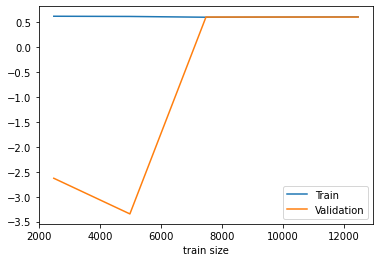

In [63]:
learning_curves(LR_model, X_train, y_train)

<i> we will assume that we are looking at a Maximizing metric, which means that bigger scores on the y-axis indicate more or better learning.</i>
 
- The training loss remains flat over training size
- The validation loss decreases to a point and begins increasing again then flattening in the end with the training score in the same value.
- In this case, We could conclude that adding more training data points won’t lead to significantly better model.

- Let's try to feed better features to the learning algorithm and see if we could obtain better performances than before 

> Based on the correlation matrix and the histograms above :
   - The most correlated variables with the target are median income, total rooms and bedrooms per room
   - There is no collinearity between those variables (the correlation between those variables against each other is not too strong they don't exceed |0.7|)
   - Total rooms and bedrooms per room variables follow a Normal Distribution
   - The Median income variable's distribution is skewed (asymmetrical distributions)

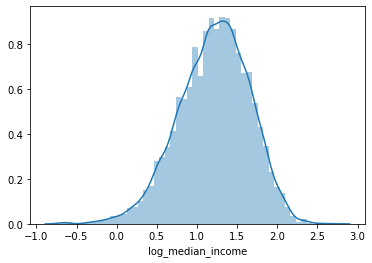

In [65]:
#Log Transformation :
boston['log_median_income'] = np.log(boston['median_income'])

sns.distplot(boston['log_median_income'])

In [69]:
boston_must_corr_vars = boston_prep[['total_rooms','bedrooms_per_room','median_house_value','<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND']]

boston_must_corr_vars['log_median_income'] = boston['log_median_income']

#boston_must_corr_vars.head(2)

In [92]:
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split_(boston_must_corr_vars,'median_house_value' )

In [75]:
#Training and testing the model
LR_model.fit(X_train_corr, y_train_corr)

y_pred = LR_model.predict(X_test_corr)

In [77]:
# Model's performance
performance_metrics(y_test_corr, y_pred)

,r2_score,MAE,MSE,RMSE
0,0.525918,50099.615253,4.520411e+09,67234.001737


- In this case, the linear regression model is unable to generalize new instances, resulting in an increase in generalization error.

### Regularized Linear Models

- For a linear model, regularization is typically achieved by constraining the weights of the model. 
- We will look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

#### Ridge Regression

- Ridge Regression is a regularized version of Linear Regression
- The regularization term equal to : $ \alpha \sum \limits _{i=1} ^{n} \theta ^{2}_{i}$ is added to the cost function. This forces the algorithm to not only fit the data but also keep the model weights as small as possible
- Ridge Regression cost function equation : $J(\theta) =MSE(\theta) + \frac{1}{2} \alpha \sum \limits _{i=1} ^{n} \theta ^{2}_{i}$
- Specifying penalty="l2" in linear regression models like SGD indicates that we want to add a regularization term to the cost function

In [78]:
from sklearn.linear_model import Ridge

In [95]:
Ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1, solver='cholesky'))

In [96]:
model_val_scores(Ridge_model, X_train, y_train)

,0
scores_val,61980.083765
scores_std,1096.697252


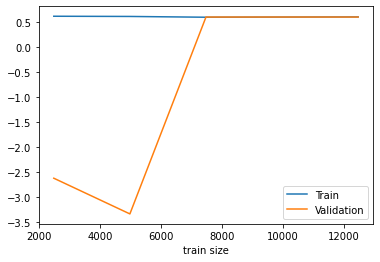

In [97]:
learning_curves(Ridge_model, X_train, y_train)

In [89]:
Ridge_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'ridge', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])

In [98]:
param_grid = {'ridge__alpha':np.arange(0.001, 5, 0.1 ),
              'ridge__tol':np.arange(0.00001, 0.1, 0.5) }

Ridge_model_best_params = GridSearchCV_(Ridge_model, param_grid , X_train, y_train)

best score : -3842720843.211815
best params : {'ridge__alpha': 3.601, 'ridge__tol': 1e-05}


In [99]:
Ridge_model_best_params.fit(X_train, y_train)

y_pred = Ridge_model_best_params.predict(X_test)

In [100]:
performance_metrics(y_test, y_pred)

,r2_score,MAE,MSE,RMSE
0,0.602072,45016.974412,3.794272e+09,61597.658742


- Ridge regression model performs better than Linear Regression model

####  Lasso Regression

- Another regularized version of Linear Regression : just like Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm
- Lasso Regression cost function equation : $J(\theta) =MSE(\theta) + \alpha \sum \limits _{i=1} ^{n} |\theta_{i}| $
- Lasso Regression automatically performs feature selection 
- Specifying penalty="l1" in linear regression models like SGD indicates that we want to add a regularization term to the cost function

In [82]:
from sklearn.linear_model import Lasso

In [83]:
Lasso_model = make_pipeline(StandardScaler(),  Lasso(alpha=0.01, max_iter=10000))

In [84]:
model_val_scores(Lasso_model, X_train, y_train)

,0
scores_val,62959.785997
scores_std,1269.310940


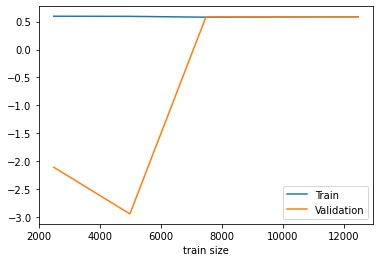

In [85]:
learning_curves(Lasso_model, X_train, y_train)

In [57]:
Lasso_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'lasso', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

In [86]:
param_grid = {'lasso__alpha':np.arange(0.0001, 0.1, 0.01)}

Lasso_best_params = GridSearchCV_(Lasso_model, param_grid, X_train, y_train)

best score : -3965545279.214495
best params : {'lasso__alpha': 0.0901}


In [92]:
Lasso_best_params.fit(X_train, y_train)

y_pred = Lasso_best_params.predict(X_test)

In [60]:
performance_metrics(y_test, y_pred)

,r2_score,MAE,MSE,RMSE
0,0.588873,45771.46967,3.920128e+09,62610.924085


### ElasticNet

- Elastic Net is a middle ground between Ridge Regression and Lasso Regression
- The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r
    - When r=0 ,Elastic Net is equivalent to Ridge Regression
    - When r = 1,Elastic Net is equivalent to Lasso Regression 
- Elastic Net cost function Equation : $J(\theta) =MSE(\theta) + r\alpha \sum \limits _{i=1} ^{n} |\theta_{i}| + \frac{1-r}{2} \alpha \sum \limits _{i=1} ^{n} \theta ^{2}_{i} $

In [87]:
from sklearn.linear_model import ElasticNet

In [88]:
ELN_model  = make_pipeline(StandardScaler(), ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=100000))

In [89]:
model_val_scores(ELN_model, X_train_corr, y_train_corr)

,0
scores_val,62959.890009
scores_std,1270.049829


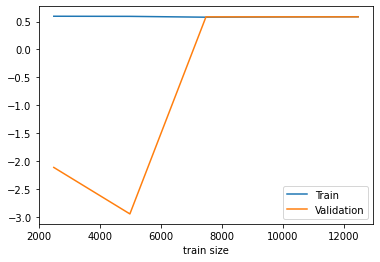

In [64]:
learning_curves(ELN_model, X_train_corr, y_train_corr)

In [65]:
ELN_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'elasticnet', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'elasticnet__alpha', 'elasticnet__copy_X', 'elasticnet__fit_intercept', 'elasticnet__l1_ratio', 'elasticnet__max_iter', 'elasticnet__normalize', 'elasticnet__positive', 'elasticnet__precompute', 'elasticnet__random_state', 'elasticnet__selection', 'elasticnet__tol', 'elasticnet__warm_start'])

In [90]:
param_grid = {'elasticnet__alpha':np.arange(0.001, 0.1, 0.1 ),
              'elasticnet__l1_ratio':np.arange(0, 1, 0.1)}

ELN_model_best_params = RandomizeSearchCV_(ELN_model, param_grid, X_train_corr, y_train_corr )

best score : -3965545228.0121126
best params : {'elasticnet__l1_ratio': 0.9, 'elasticnet__alpha': 0.001}


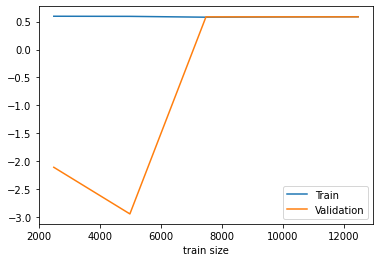

In [67]:
learning_curves(ELN_model_best_params, X_train_corr, y_train_corr)

In [68]:
ELN_model_best_params.fit(X_train_corr, y_train_corr)

y_pred = ELN_model_best_params.predict(X_test_corr)

In [69]:
performance_metrics(y_test_corr, y_pred)

,r2_score,MAE,MSE,RMSE
0,0.588867,45772.389146,3.920184e+09,62611.375448


## Support Vector Machine 

- SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (instances off the street)
- The width of the street is controlled by a hyperparameter ε (epsilon)
- SVMs are sensitive to the feature scales
- The hyperparameter C acts like a regularization hyperparameter : if our model is overfitting, we should reduce it, and if it is underfitting, we should increase it 
- There is little regularization with a large C value, and much more regularization with, a small C value



In [70]:
from sklearn.svm import SVR

In [71]:
SVR_model = make_pipeline( StandardScaler(), SVR(epsilon=1.5, kernel='linear', C=100) )

In [72]:
model_val_scores(SVR_model, X_train, y_train)

,0
scores_val,81187.273695
scores_std,33873.953469


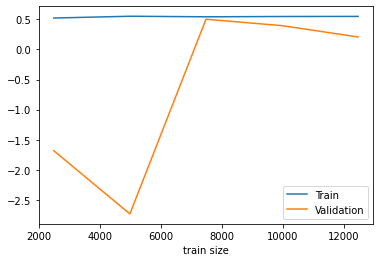

In [73]:
learning_curves(SVR_model, X_train, y_train)

- The plot of learning curves shows overfitting because the training score is relatively high. while the validation score increases to a point and begins decreasing again .

In [74]:
SVR_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svr', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svr__C', 'svr__cache_size', 'svr__coef0', 'svr__degree', 'svr__epsilon', 'svr__gamma', 'svr__kernel', 'svr__max_iter', 'svr__shrinking', 'svr__tol', 'svr__verbose'])

In [75]:
param_grid = {'svr__C':np.arange(10, 50, 5), 'svr__epsilon':np.arange(1, 6, 1), 'svr__kernel':['rbf','linear']}

In [77]:
SVR_best_params = RandomizeSearchCV_(SVR_model, param_grid , X_train, y_train)

best score : -4882817346.315078
best params : {'svr__kernel': 'linear', 'svr__epsilon': 2, 'svr__C': 19}


In [78]:
SVR_best_params.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=19, cache_size=200, coef0=0.0, degree=3, epsilon=2,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [79]:
y_pred = SVR_best_params.predict(X_test)

In [80]:
performance_metrics(y_test, y_pred)

,r2_score,MAE,MSE,RMSE
0,0.535375,46638.56886,4.430233e+09,66559.992271


## K-Nearest Neighbors 

KNN how it works :
  - Calculate the distance between the data sample and every other sample with the help of a method such as Euclidean.
  - Sort these values of distances in ascending order.
  - Choose the top K values from the sorted distances.
  - return the mean of the nearest K neighbors.

- KNN is a non-parametric algorithm because it does not assume anything about the training data. This makes it useful for problems having non-linear data.
- KNN can be very sensitive to the scale of data as it relies on computing the distances. For features with a higher scale, the calculated distances can be very high and might produce poor results. It is thus advised to scale the data before running the KNN.
- KNN can be computationally expensive both in terms of time and storage, if the data is very large because KNN has to store the training data to work. This is generally not the case with other supervised learning models.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KNR_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=15,n_jobs=-1 ))

In [ ]:
model_val_scores(KNR_model, X_train, y_train)

,0
scores_val,60679.164148
scores_std,809.516117


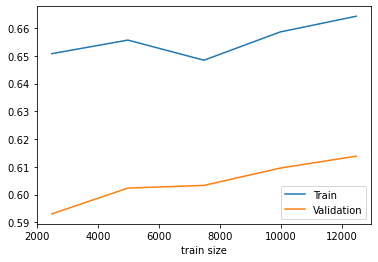

In [ ]:
learning_curves(KNR_model, X_train, y_train)

- Both training and validation score increase over traing size with a high gap between them

In [ ]:
KNR_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'kneighborsregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'kneighborsregressor__algorithm', 'kneighborsregressor__leaf_size', 'kneighborsregressor__metric', 'kneighborsregressor__metric_params', 'kneighborsregressor__n_jobs', 'kneighborsregressor__n_neighbors', 'kneighborsregressor__p', 'kneighborsregressor__weights'])

In [ ]:
param_grid = {'kneighborsregressor__n_neighbors':np.arange(5, 100, 1),
             'kneighborsregressor__p':[1,2],
             'kneighborsregressor__weights':['uniform','distance'],
             'kneighborsregressor__leaf_size':np.arange(20,50,5)}


KNR_model_best_params = RandomizeSearchCV_(KNR_model, param_grid , X_train, y_train)

best score : -3633230046.006597
best params : {'kneighborsregressor__weights': 'distance', 'kneighborsregressor__p': 1, 'kneighborsregressor__n_neighbors': 28, 'kneighborsregressor__leaf_size': 35}


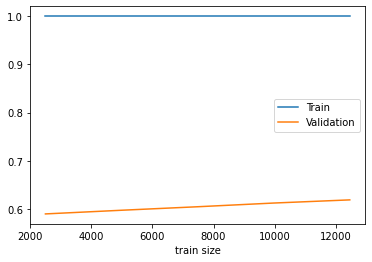

In [ ]:
learning_curves(KNR_model_best_params, X_train, y_train)

- The Training curve is at fixed high score and the validation curve is almost fixed in a low score

In [ ]:
KNR_model_best_params.fit(X_train, y_train)

y_pred = KNR_model_best_params.predict(X_test)

In [ ]:
performance_metrics(y_test, y_pred)

,r2_score,MAE,MSE,RMSE
0,0.639346,42168.322451,3.438868e+09,58641.866231


## Decision Trees

- Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees .
- the idea is really quite simple: the algorithm first splits the training set into two subsets using a single feature k and a threshold $t_{k}$, then it splits the subsets using the same logic, then the sub-subsets, and so on, in a way that minimizes the MSE.
- To avoid overfitting the training data, we need to restrict the Decision Tree’s freedom (max_depth, min_samples_split, min_samples_leaf  ...) during training. As we know , this is called regularization 
- One of the many qualities of Decision Trees is that they require very little data preparation. In particular, they don’t require feature scaling or centering also dummy encoding
-  CART cost function for regression equation :

$J(k,t_{K}) = \frac{m_{left}}{m}MSE_{left}+\frac{m_{right}}{m}MSE_{right}$   


where : $\binom{MSE_{node} = \sum _{i \in node} ( \hat{y}_{node} - y^{(i)}) ^{2}}{\hat{y}_{node} = \frac{1}{m_{node}} \sum _{i \in node} y^{(i)}}$

Decision Trees limitations :
- Decision Trees is that they are very sensitive to small variations in the training data. In other words, if the training data is changed the resulting decision tree can be quite different, and in turn, the predictions can be quite different
- Also Decision trees are computationally expensive to train, carry a big risk of overfitting, and tend to find local optima because they can’t go back after they have made a split.
- Random Forests can limit this instability by averaging predictions over many trees 

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTR_model = make_pipeline(DecisionTreeRegressor())

In [ ]:
model_val_scores(DTR_model ,X_train, y_train)

,0
scores_val,76421.619793
scores_std,931.982189


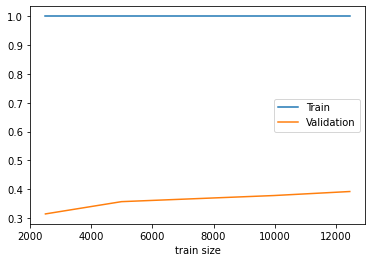

In [ ]:
learning_curves(DTR_model, X_train, y_train)

- The Training curve is at fixed high score and the validation curve is almost fixed in a low score

In [ ]:
DTR_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeregressor', 'decisiontreeregressor__ccp_alpha', 'decisiontreeregressor__criterion', 'decisiontreeregressor__max_depth', 'decisiontreeregressor__max_features', 'decisiontreeregressor__max_leaf_nodes', 'decisiontreeregressor__min_impurity_decrease', 'decisiontreeregressor__min_impurity_split', 'decisiontreeregressor__min_samples_leaf', 'decisiontreeregressor__min_samples_split', 'decisiontreeregressor__min_weight_fraction_leaf', 'decisiontreeregressor__presort', 'decisiontreeregressor__random_state', 'decisiontreeregressor__splitter'])

In [ ]:
#Let's gain a comprehensive understanding of these hyperparameters using tree visualizations.
param_grid = {'decisiontreeregressor__max_depth':np.arange(5, 30, 1), 
              'decisiontreeregressor__max_features':np.arange(7, 12, 1)               
             }

DTR_model_best_params = GridSearchCV_(DTR_model, param_grid , X_train, y_train)

best score : -3576200561.0229096
best params : {'decisiontreeregressor__max_depth': 7, 'decisiontreeregressor__max_features': 10}


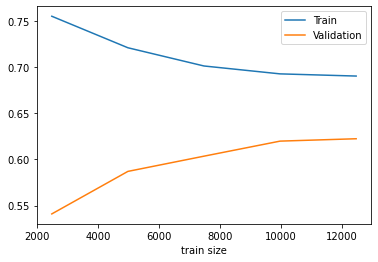

In [ ]:
learning_curves(DTR_model_best_params, X_train, y_train)

- The training score decreases while the validation score increases.
- This indicates that the model is capable of further learning and possible further improvements and the training process was halted prematurely.

In [ ]:
DTR_model_best_params.fit(X_train, y_train)

y_pred = DTR_model_best_params.predict(X_test)

In [ ]:
performance_metrics(y_test, y_pred)

,r2_score,MAE,MSE,RMSE
0,0.642283,42029.058411,3.410858e+09,58402.553905


## Ensemble Methods

- An Ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions (increase performance) than any individual model, a model comprised of many models is called an Ensemble model.
- Ensemble methods can decrease variance using bagging approach, bias using a boosting approach, or improve predictions using stacking approach

### Random Forest 

- Random Forest is an ensemble of Decision Trees , generally trained via the bagging method (or sometimes pasting)
     - **Bagging method** (Bootstrap Aggregation) : refers to random sampling with replacement .It is can be used to reduce the variance for those algorithm that have high variance, typically decision trees
     - **Pasting method**: it refers to random sampling without replacement with the same features as the bagging method
- RandomForestRegressor  has all the hyperparameters of a DecisionTreeRegressor (to control how trees are grown), plus all the hyperparameters of a BaggingRegressor to control the ensemble itself.
- The trees in random forests are run in parallel. There is no interaction between these trees while building the trees.
- It can handle thousands of input variables without variable deletion.
- It operates by constructing a multitude of decision trees at training time and outputting the mean prediction of the individual trees.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR_model  = make_pipeline(RandomForestRegressor(n_estimators=12, n_jobs=-1))

In [ ]:
model_val_scores(RFR_model, X_train, y_train)

,0
scores_val,56645.329506
scores_std,752.157029


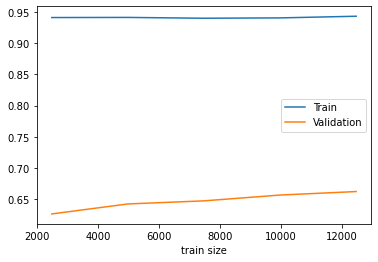

In [ ]:
learning_curves(RFR_model, X_train, y_train)

In [ ]:
RFR_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'randomforestregressor', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_impurity_split', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregressor__warm_start'])

In [ ]:
param_grid = {'randomforestregressor__max_depth':np.arange(10, 40, 10),
             'randomforestregressor__n_estimators':np.arange(200, 300, 20)}

RFR_model_best_params = GridSearchCV_(RFR_model, param_grid , X_train, y_train)

best score : -2983246217.086509
best params : {'randomforestregressor__max_depth': 10, 'randomforestregressor__n_estimators': 260}


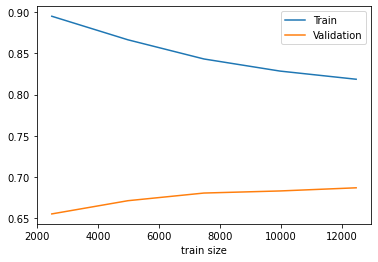

In [ ]:
learning_curves(RFR_model_best_params, X_train, y_train)

In [ ]:
RFR_model_best_params.fit(X_train, y_train)

y_pred = RFR_model_best_params.predict(X_test)

In [ ]:
performance_metrics(y_test, y_pred)

,r2_score,MAE,MSE,RMSE
0,0.701277,38245.361106,2.848348e+09,53369.919352


### AdaBoost

- AdaBoost is a **boosting** algorithm .
  - Boosting algorithm : refers to a group of algorithms that utilize weighted averages to make weak learners into stronger learners. Each model that runs, dictates what features the next model will focus on.
- How it works : the new predictor corrects  its predecessor by paying a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases.
- If AdaBoost ensemble is overfitting the training set, we can try reducing the number of estimators or more strongly regularizing the base estimator.

In [43]:
from sklearn.ensemble import AdaBoostRegressor

In [44]:
ada_model = make_pipeline(AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=200, learning_rate=0.5))

In [45]:
model_val_scores(ada_model, X_train, y_train)

,0
scores_val,77647.050561
scores_std,1564.487836


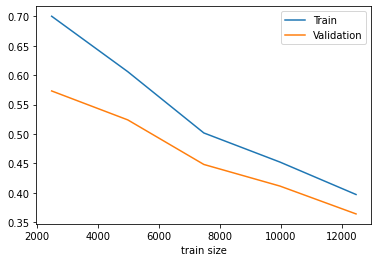

In [47]:
learning_curves(ada_model, X_train, y_train)

- The training and the validation loss continue to decrease until the end of training

In [48]:
ada_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'adaboostregressor', 'adaboostregressor__base_estimator__ccp_alpha', 'adaboostregressor__base_estimator__criterion', 'adaboostregressor__base_estimator__max_depth', 'adaboostregressor__base_estimator__max_features', 'adaboostregressor__base_estimator__max_leaf_nodes', 'adaboostregressor__base_estimator__min_impurity_decrease', 'adaboostregressor__base_estimator__min_impurity_split', 'adaboostregressor__base_estimator__min_samples_leaf', 'adaboostregressor__base_estimator__min_samples_split', 'adaboostregressor__base_estimator__min_weight_fraction_leaf', 'adaboostregressor__base_estimator__presort', 'adaboostregressor__base_estimator__random_state', 'adaboostregressor__base_estimator__splitter', 'adaboostregressor__base_estimator', 'adaboostregressor__learning_rate', 'adaboostregressor__loss', 'adaboostregressor__n_estimators', 'adaboostregressor__random_state'])

In [91]:
param_grid = {'adaboostregressor__base_estimator__max_depth':np.arange(5,20,5),
              'adaboostregressor__n_estimators':np.arange(100, 300, 50),
              'adaboostregressor__learning_rate' : np.arange(0.001, 0.9, 0.9)
               }

ada_best_params = RandomizeSearchCV_(ada_model, param_grid, X_train, y_train )

best score : -3036795267.987372
best params : {'adaboostregressor__n_estimators': 250, 'adaboostregressor__learning_rate': 0.001, 'adaboostregressor__base_estimator__max_depth': 10}


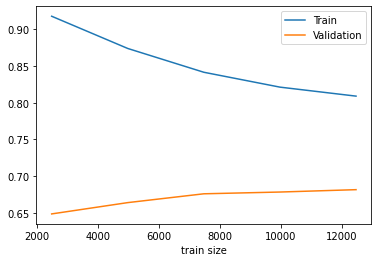

In [50]:
learning_curves(ada_best_params, X_train, y_train)

In [51]:
ada_best_params.fit(X_train, y_train)

y_pred = ada_best_params.predict(X_test)

In [52]:
performance_metrics(y_test, y_pred)

,r2_score,MAE,MSE,RMSE
0,0.698197,37828.896278,2.877721e+09,53644.390559


### Performances conclusion :

- Let's classify for the small to the high the RMSE of all the models to see who perform well on the test data and could certainly rely on it to predict the Boston house price 

In [176]:
final_RMSE = pd.DataFrame(data = [[53369.91], [53644.39], [58402.55], [58641.86], [61597.65], [61980.19], [62610.92], [62611.37], [66559.99]], 
                          index = ['Random Forest Regressor','AdaBoost Regressor','Decision Tree Regressor',
                                     'KNeighbors Regressor', 'Ridge', 'Linear Regression', 'Lasso',
                                     'ElasticNet','Support Vector Regressor'],
                          columns = ['RMSE'])

In [177]:
cm = sns.light_palette('green', as_cmap=True)

final_RMSE = final_RMSE.style.background_gradient(cmap=cm)
final_RMSE

,RMSE
Random Forest Regressor,53369.910000
AdaBoost Regressor,53644.390000
Decision Tree Regressor,58402.550000
KNeighbors Regressor,58641.860000
Ridge,61597.650000
Linear Regression,61980.190000
Lasso,62610.920000
ElasticNet,62611.370000
Support Vector Regressor,66559.990000


- As we see, Random Forest Regression works the best for this dataset

#### Please upvote if you found this kernel useful!

#### Feedback is greatly appreciated!

### References


- <a src='https://www.amazon.fr/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291'> Hands-On Machine Learning with Scikit-Learn and TensorFlow </a>
- <a src='https://fr.coursera.org/learn/machine-learning?action=enroll&authType=google'> Andrew Ng Machine learning course</a>
- <a src='https://machinelearnia.com/machine-learning/'>MachineLearnia</a>
- <a src='https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing'>Sklearn Preprocessing</a>
- <a src='https://machinelearningmastery.com/linear-regression-for-machine-learning/'>Machine Learning Mastery: Linear Regression for Machine Learning</a>
- <a src='https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214'>Writting math equations </a>
- <a src='https://towardsdatascience.com/k-nearest-neighbors-94395f445221'> towardsdatascience KNN </a>
- <a src='https://towardsdatascience.com/understanding-random-forest-58381e0602d2'> towardsdatascience Random Forest </a>
